In [303]:
import glob
import matplotlib.pyplot as plt
import os
import re
import numpy as np

In [304]:
root_path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
log_path = os.path.join(root_path, 'log')
log_prefix = 'lockfree-nohotspot-skiplist'
log_file_names = glob.glob(log_path + f"/{log_prefix}-*.log")
name_pattern = re.compile(rf".+{log_prefix}(-[a-z]+)?-n\d+-i(\d+)-u\d+\.\d+\.log")
log_pattern = re.compile(r"Thread \d+: range query from \d+ found \d+ values, took (\d+) us")
log_pattern2 = re.compile(r"Adding \d+ entries to set took (\d+) us")

[2.631768743093119, 3.035996488147498, 3.8651011741194106, 4.009881544221445, 13.143696581196581, 19.95310896223867]
[2.3448945371105814, 3.308800402591684, 4.442398286937902, 4.507607433217189, 15.436838082760127, 25.35882321419002]
[1.6645468998410176, 2.948365105415983, 3.505772268805444, 4.153892215568862, 13.243352788586252, 20.904816388798082]


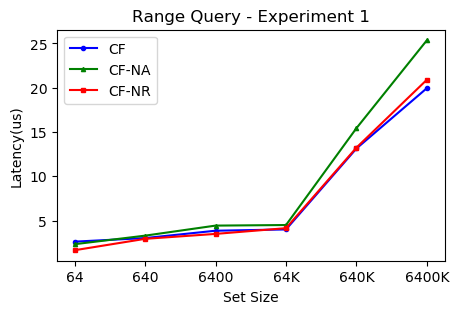

[58, 340, 13308, 216924, 11863751, 160815244]
[27, 347, 11337, 214663, 9368222, 141165219]
[23, 359, 13059, 210491, 11457979, 156657962]


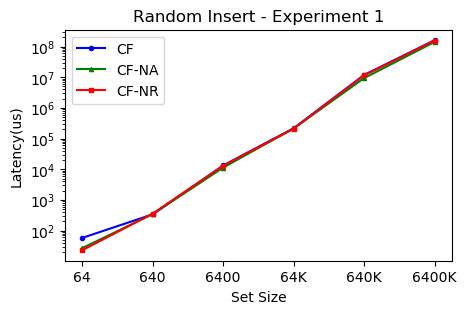

In [305]:
values_cf = []
values_cf_na = []
values_cf_nr = []
         
for log_file in log_file_names:
    match = name_pattern.match(log_file)
    if match:
        option = match.group(1)
    else:
        continue

    total_time = 0
    count = 0
    with open(log_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('Thread '):
                m = log_pattern.match(line)
                if m:
                    time = int(m.group(1))
                    total_time += time
                    count += 1

    if count > 0:
        average_time = total_time / count
        if option is None:
            values_cf.append(average_time)
        elif option == '-cfnr':
            values_cf_nr.append(average_time)
        elif option == '-cfna':
            values_cf_na.append(average_time)
        else:
            continue

    #     print(f"Average time for {log_file}: {average_time} us")
    #     print(count)
    # else:
    #     print(f"No 'took ... us' patterns found in {log_file}.")

values_cf.sort()
values_cf_na.sort()
values_cf_nr.sort()

print(values_cf)
print(values_cf_na)
print(values_cf_nr)

# 데이터 설정
categories = ['64', '640', '6400', '64K', '640K', '6400K']

# 카테고리별 인덱스를 생성하여 각 점의 x 좌표로 사용
x = np.arange(len(categories))

# 새로운 그래프 생성
fig, ax = plt.subplots(figsize=(5, 3))

# 각 데이터 시리즈에 대한 점과 선 플롯 생성
ax.plot(x, values_cf, marker='o', linestyle='-', color='blue', label='CF', markersize=3)
ax.plot(x, values_cf_na, marker='^', linestyle='-', color='green', label='CF-NA', markersize=3)
ax.plot(x, values_cf_nr, marker='s', linestyle='-', color='red', label='CF-NR', markersize=3)

# x축에 카테고리 이름 설정
ax.set_xticks(x)
ax.set_xticklabels(categories)

# 레이블과 타이틀 설정
ax.set_xlabel('Set Size')
ax.set_ylabel('Latency(us)')
ax.set_title('Range Query - Experiment 1')

# 범례 표시
ax.legend()

plt.savefig('Range_query.svg', format='svg')

# 그래프 표시
plt.show()

################################ GRAPH2 ################################

values_cf1 = []
values_cf_na1 = []
values_cf_nr1 = []

for log_file in log_file_names:
    match = name_pattern.match(log_file)
    if match:
        option = match.group(1)
    else:
        continue

    with open(log_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('Adding '):
                m = log_pattern2.match(line)
                if m:
                    elapsed_time = int(m.group(1))              

    if option is None:
        values_cf1.append(elapsed_time)
    elif option == '-cfnr':
        values_cf_nr1.append(elapsed_time)
    elif option == '-cfna':
        values_cf_na1.append(elapsed_time)
    else:
        continue

values_cf1.sort()
values_cf_na1.sort()
values_cf_nr1.sort()

print(values_cf1)
print(values_cf_na1)
print(values_cf_nr1)

# 데이터 설정
categories = ['64', '640', '6400', '64K', '640K', '6400K']

# 카테고리별 인덱스를 생성하여 각 점의 x 좌표로 사용
x = np.arange(len(categories))

# 새로운 그래프 생성
fig, ax = plt.subplots(figsize=(5, 3))

# 각 데이터 시리즈에 대한 점과 선 플롯 생성
ax.plot(x, values_cf1, marker='o', linestyle='-', color='blue', label='CF', markersize=3)
ax.plot(x, values_cf_na1, marker='^', linestyle='-', color='green', label='CF-NA', markersize=3)
ax.plot(x, values_cf_nr1, marker='s', linestyle='-', color='red', label='CF-NR', markersize=3)

# x축에 카테고리 이름 설정
ax.set_xticks(x)
ax.set_xticklabels(categories)

# 레이블과 타이틀 설정
ax.set_xlabel('Set Size')
ax.set_ylabel('Latency(us)')
ax.set_title('Random Insert - Experiment 1')

# 범례 표시
ax.legend()

plt.yscale('log')

plt.savefig('Random_insert.svg', format='svg')

# 그래프 표시
plt.show()